# ODEs: Projectile motion


In one of our problem sets, we simulated the the equation for a projectile. Of course, the answer is:

$$
\vec{x}(t) = \frac{1}{2}\vec{a}_0t^2 + \vec{v}_0 t + \vec{x}_0
$$

However, we now will be looking into direct solution of the ordinary differential equation using numerical methods. The equation of motion is

$$
\ddot{\vec{r}}(t) = -g\hat{y}
$$

We will try three different methods:

- Euler 
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \tau \vec{v}_n$$
- Euler-Cromer
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \tau \vec{v}_{n+1}$$
- Midpoint
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \frac{\tau}{2}\left(\vec{v}_n + \vec{v}_{n+1}\right)$$


We will also investigate using air resistance:

$$F_D = \frac{1}{2}\rho v^2 C_D A$$


In [1]:
%pylab inline
# import our ode solver
from UtilityFunctions.odes import *

Populating the interactive namespace from numpy and matplotlib


Set some constants (mass, Cd, etc.):

In [17]:
Cd = 0.35      # Drag coefficient (dimensionless)
area = .4  # Cross-sectional area of the baseball (m^2)
grav = -9.81    # Gravitational acceleration (m/s^2) in positive y direction
mass = 0.150  # Mass of the baseball (kg)

# Use air resistance or not?
airFlag = False
if not airFlag  :
    rho = 0      # No air resistance
else :
    rho = 1.2    # Density of air (kg/m^3)
    
air_const = 0.5*Cd*rho*area/mass  # Air resistance constant
print("Air Constant: {}".format(air_const))

Air Constant: 0.0


Choose which ODE solver and set parameters

In [18]:
# Solver:
# method = 'Euler'
# method = 'Euler-Cromer'
# method = 'Midpoint'
method = 'Euler-Cromer'
# Maximum number of steps
maxStep = 700

# Time step
tau = .001

# Height
h = 2 # height of starting point in m in y direction

# Initial x velocity
vix = 40 # Average baseball starting speed in m/s in x direction

# Max time
tmax = maxStep*tau # calculate!

# State values.
t = np.arange(0,tmax,tau) # time
r = np.zeros((maxStep,2)) # location (x,y)
v = np.zeros((maxStep,2)) # velocity (x,y)
a = np.zeros((maxStep,2)) # acceleration (x,y)
r[0,:] = np.array([0,h])     # start location
v[0,:] = np.array([vix,0])   # start velocity
a[0,:] = np.array([0,grav])  # start accelartion

## Get true solutions with no air resistance

In [19]:
t = np.arange(0,tmax,tau) # time
r0 = np.array(r[0]).reshape((2,1))
v0 = np.array(v[0]).reshape((2,1))
a0 = np.array(a[0]).reshape((2,1))
rtrue = r0 + v0 * t + 0.5 * a0*t**2
cut = (rtrue[1,:] > 0)
rtrue = rtrue.T[cut].T

### Plot the true trajectory for the baseball

*Note:* We are playing on solid ground!

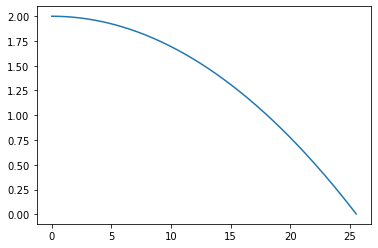

In [20]:
# Plot rtrue for x,y coordinates
plot(rtrue[0],rtrue[1])

## Simulate the trajectory

In [21]:
# prepare start conditions
ri = np.array(r[0])  # same start conditions as true trajectory
vi = np.array(v[0])  # same start conditions as true trajectory
ai = np.array(a[0])  # same start conditions as true trajectory
state = np.array( [ri,vi,ai] ) # prepare ode state
method = b'Euler-Cromer'
# Loop until ball hits ground or max steps completed
for iStep in np.arange(1,maxStep) :
    ti = t[iStep-1]
    state[2] =-air_const*state[1][0] * state[1]  # accelaration
    state[2][1] += grav 
    
    #* Calculate the new position and velocity using ODE solver
    if method == b'Euler':
        state = step_euler(tau, state)
    elif method == b'Euler-Cromer':
        state = step_euler_cromer(tau, state)
    elif method == b'Midpoint':
        state = step_midpoint(tau,state)
    # Store solution in state values
    r[iStep] = state[0]
    v[iStep] = state[1]
    a[iStep] = state[2]


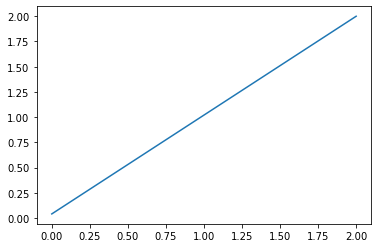

In [22]:
plot(r[0],r[1])

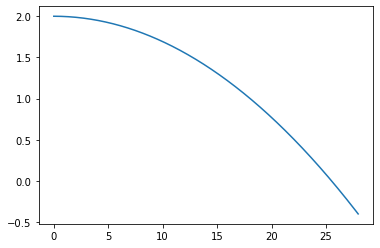

In [23]:
plot(r[:,0],r[:,1])

### Plot the simulated trajectory and the true trajectory

*Note:* Still playing on solid ground!

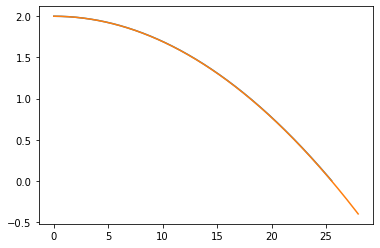

In [24]:
plot(rtrue[0],rtrue[1])
plot(r[:,0],r[:,1])